# MODELIZACIÓN PARA REGRESIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/mcent/OneDrive/Escritorio/MARTIN/MASTERS/DS4B/DATA SCIENCE/03_MACHINE_LEARNING/07_CASOS/FORECASTING RETAIL'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZANDO PARA UN PRODUCTO

In [5]:
x = x.loc[(x.store_id == 'CA_3') & (x.item_id == 'FOODS_3_586')]

In [6]:
x

,date,store_id,item_id,ventas_mm_8,ventas_mm_7,ventas_mm_6,ventas_mm_9,ventas_mm_10,ventas_mm_3,ventas_mm_2,...,year_2013,event_type_1_Cultural,year_te,month_5,year_2014,event_type_1_Religious,month_12,event_name_1_Halloween,wday_3,wday_7
7343,2013-01-16,CA_3,FOODS_3_586,9.12,9.14,9.33,9.33,9.10,8.33,11.50,...,1.00,0.00,29.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7344,2013-01-17,CA_3,FOODS_3_586,8.75,8.86,8.17,8.78,9.00,9.67,9.00,...,1.00,0.00,29.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7345,2013-01-18,CA_3,FOODS_3_586,9.38,8.86,9.17,9.22,9.20,10.33,9.50,...,1.00,0.00,29.95,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7346,2013-01-19,CA_3,FOODS_3_586,8.75,9.00,8.67,9.22,9.10,9.00,10.50,...,1.00,0.00,29.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7347,2013-01-20,CA_3,FOODS_3_586,9.50,9.29,10.50,9.22,9.60,11.33,10.50,...,1.00,0.00,29.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,2015-11-26,CA_3,FOODS_3_586,7.38,7.00,6.83,7.11,7.10,6.00,5.00,...,0.00,0.00,28.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8388,2015-11-27,CA_3,FOODS_3_586,7.88,7.86,8.50,8.11,7.80,8.00,9.50,...,0.00,0.00,28.16,0.00,0.00,0.00,0.00,0.00,0.00,1.00
8389,2015-11-28,CA_3,FOODS_3_586,8.12,8.71,8.50,8.11,8.30,9.67,12.00,...,0.00,0.00,28.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8390,2015-11-29,CA_3,FOODS_3_586,8.38,8.14,8.00,7.89,7.90,10.00,8.00,...,0.00,0.00,28.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
y = y[y.index.isin(x.index)]

### MODELIZAR

#### Definir las variables de modelización

In [15]:
var_modelizar = x.columns.to_list()[3:]

#### Definir la validacion

In [16]:
time_cv = TimeSeriesSplit(3, test_size = 8)

#### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [17]:
pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])

grid = [   {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__min_samples_leaf': [500],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
           }
       ]

#### Optimizar los hiper parámetros

#####  Con random search

In [18]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(x[var_modelizar],y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.69,0.00,0.00,0.00,HistGradientBoostingRegressor(),{'algoritmo': HistGradientBoostingRegressor()},-4.44,-1.89,-3.58,-3.30,1.06,1


In [19]:
modelo_final = modelo.best_estimator_.fit(x[var_modelizar],y)

In [20]:
prediccion = modelo_final.predict(x[var_modelizar])

In [21]:
temp = pd.concat([x.date.reset_index(drop=True),y.reset_index(drop=True),pd.Series(prediccion,name = 'prediccion')],axis = 1).set_index('date')

In [22]:
temp

,ventas,prediccion
date,,
2013-01-16,6,6.63
2013-01-17,13,11.45
2013-01-18,8,10.04
2013-01-19,13,12.36
2013-01-20,13,11.43
...,...,...
2015-11-26,14,12.60
2015-11-27,10,10.05
2015-11-28,6,8.00


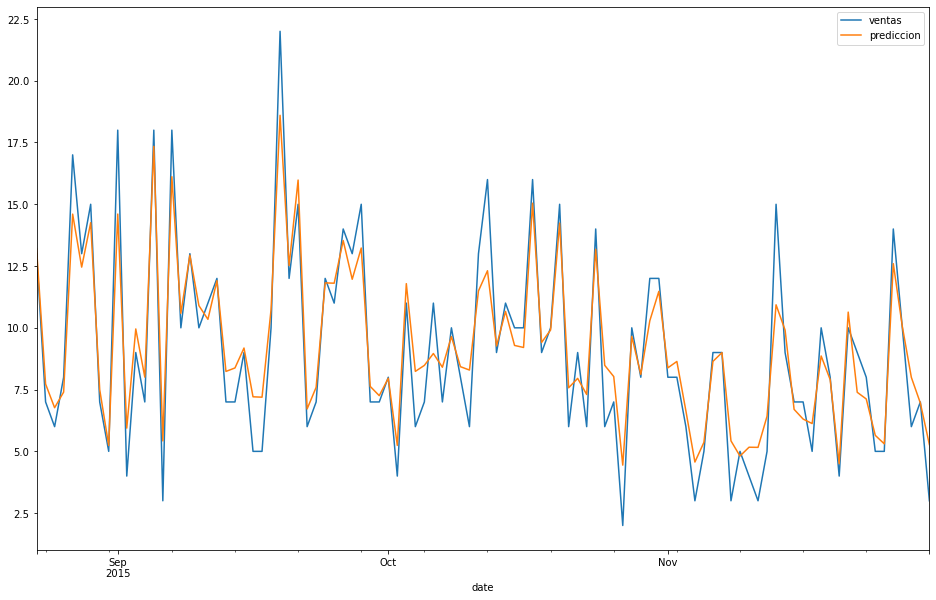

In [23]:
temp.tail(100).plot(figsize = (16,10));

## ESCALAR A TODOS LOS PRODUCTOS

### MODELIZACIÓN

Tenemos el proceso funcionando para modelizar un producto.

Lo escalamos a todas las combinaciones de tiendas y productos.

Volvemos a importar los datos.

In [24]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

In [25]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

Incluímos como una nueva variable la combinación de tienda-producto y eliminamos las originales.

In [26]:
x.insert(loc=0,column='producto',value=x.store_id + '_'+ x.item_id)
x = x.drop(columns = ['store_id','item_id'])

Para poder aplicar el proceso de forma recurrente vamos a crear una lista donde cada elemento sean los datos de cada producto.

In [27]:
productos = list(x.groupby("producto"))

Encapsulamos el proceso de modelización individual en una función, a la que iremos llamando en cada producto.

In [28]:
#Recibe los datos de las x y la y de cada producto

def modelizar(x_producto, y):
          
    #Excluye el producto como variable de modelización
    var_modelizar = x_producto.columns.to_list()[2:]
    
    #Define la validación cruzada
    time_cv = TimeSeriesSplit(3, test_size = 8)
    
    #Define la parrilla de algoritmos
    pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])
    grid = [ 
         {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20,50],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
         }
                       
    ]
           
    #Crea los modelos
    random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)
    
    modelo = random_search.fit(x_producto[var_modelizar],y)
    
    #Reentrena el mejor sobre todos los datos
    modelo_final = modelo.best_estimator_.fit(x_producto[var_modelizar],y)
    
    #Devuelve como salida el modelo final
    return(modelo_final)

Creamos otra lista vacía donde vamos a ir guardando los modelos entrenados de cada producto.

In [29]:
lista_modelos = []

Recorremos cada elemento de la lista de productos y vamos rellendando lista_modelos con el nombre y modelo final de cada producto.

In [30]:
for cada in productos:
    #Renombra por claridad
    producto = cada[0]
    datos = cada[1]
    #Selecciona solo los datos de la target que se corresponden con el producto
    y_cada = y[y.index.isin(datos.index)]

    #Llama a la funcion de modelizar
    modelo = modelizar(datos,y_cada)
    #Añade el modelo final a la lista
    lista_modelos.append((producto,modelo))
    

In [31]:
lista_modelos[0:20]

[('CA_3_FOODS_3_090',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_120',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_202',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_252',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_288',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_329',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_555',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_586',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_587',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_714',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_4_FOODS_3_090',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),

Comprobamos.

NOTA: El objetivo aquí no es evaluar la calidad del modelo, ya que no estamos usando los datos de entrenamiento.

Simplemente para comprobar que el proceso funciona bien y no vemos nada raro antes de continuar.

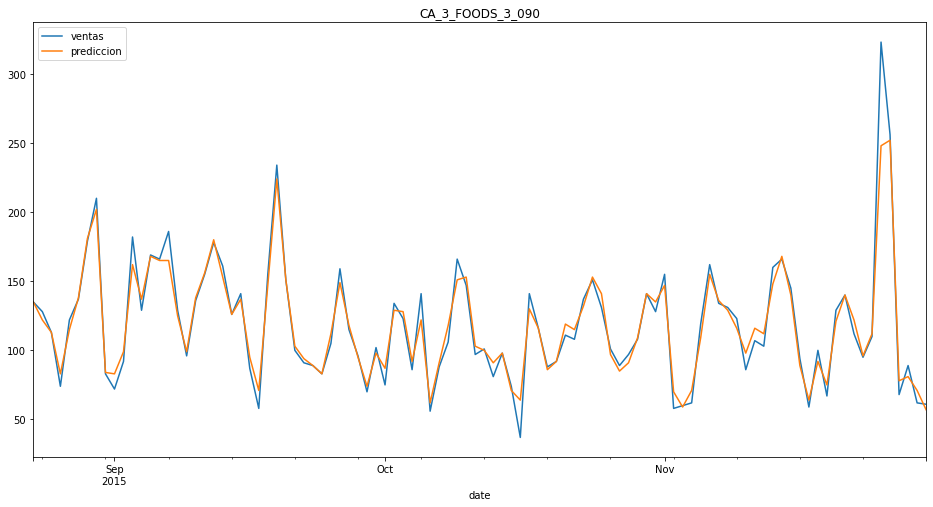

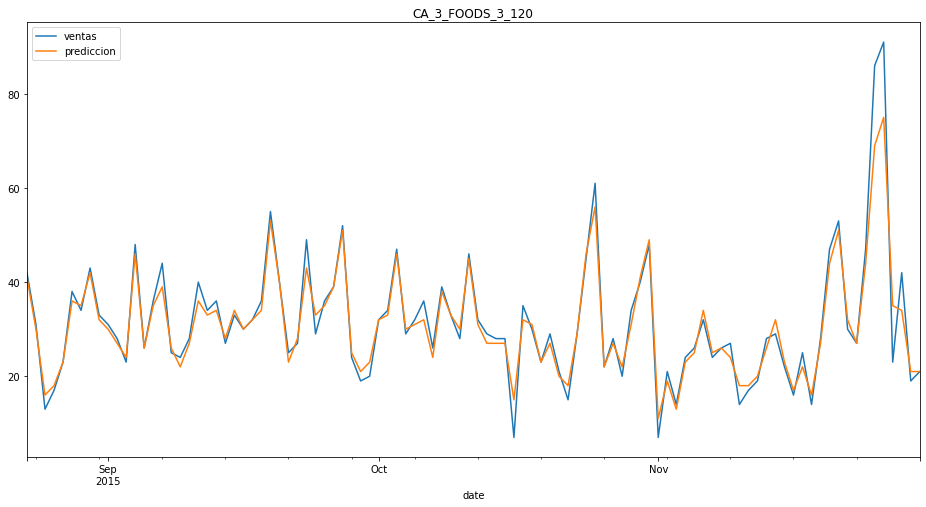

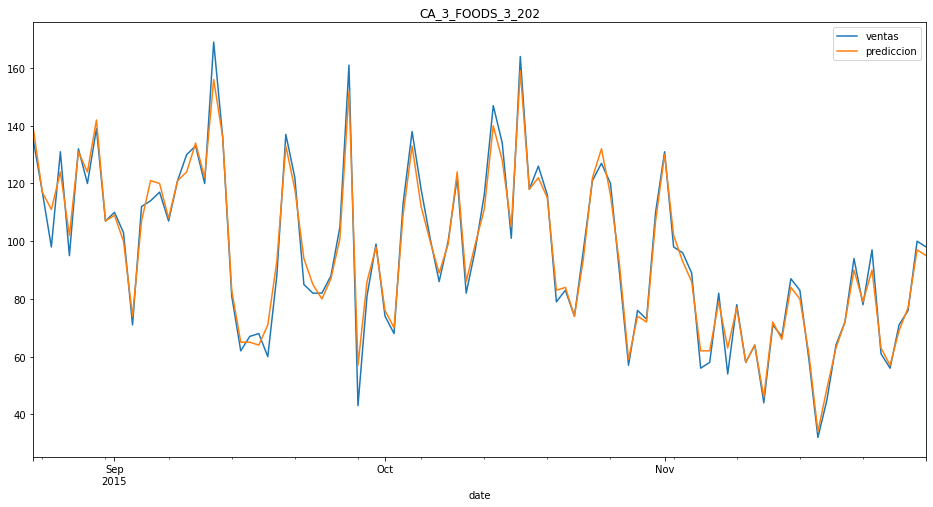

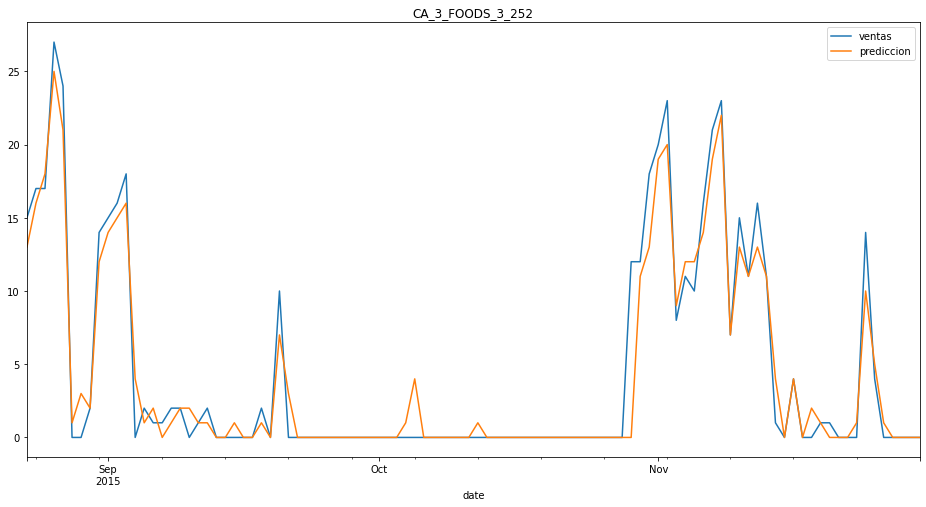

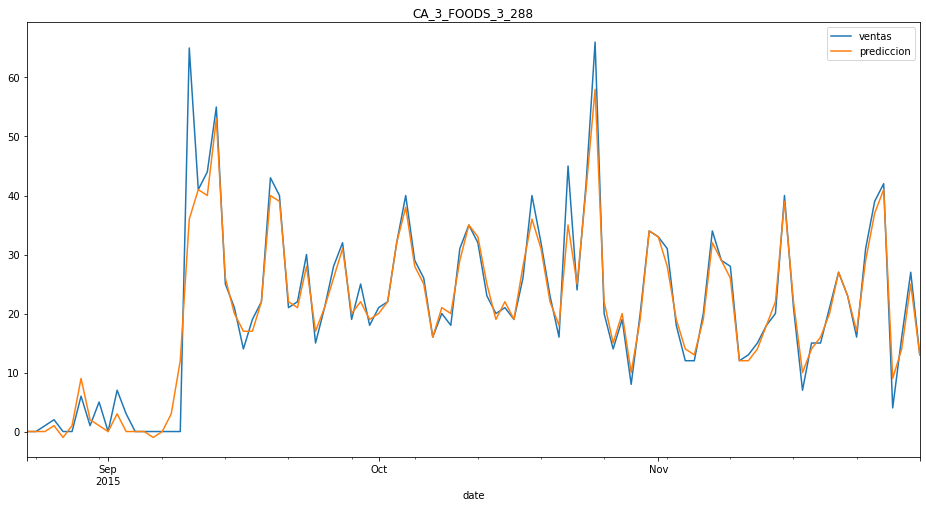

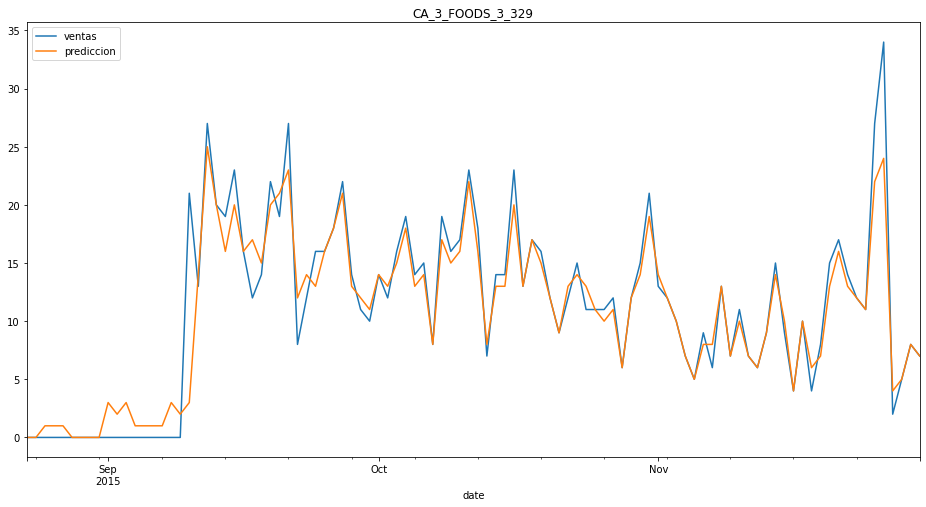

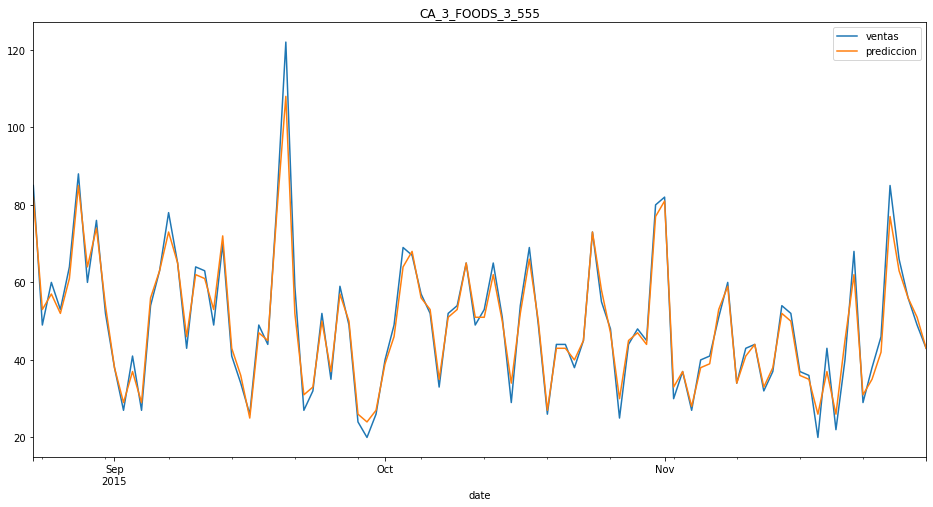

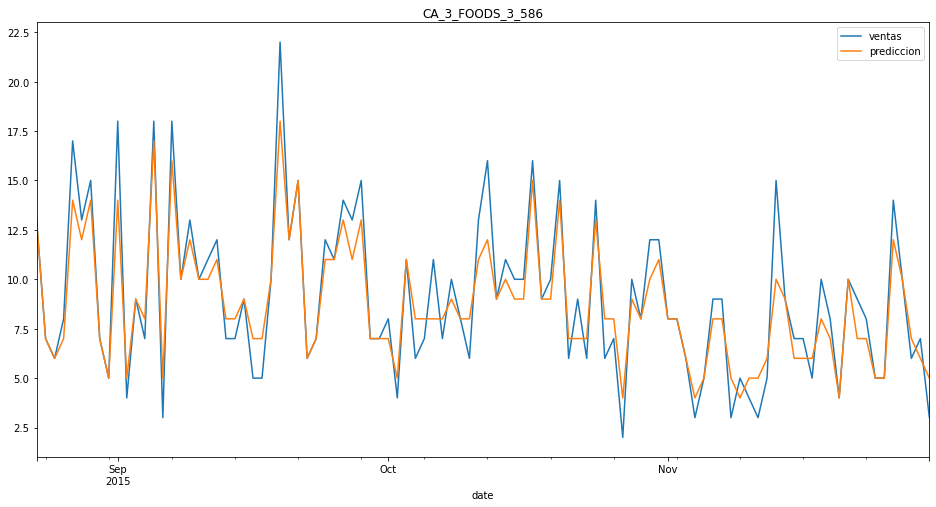

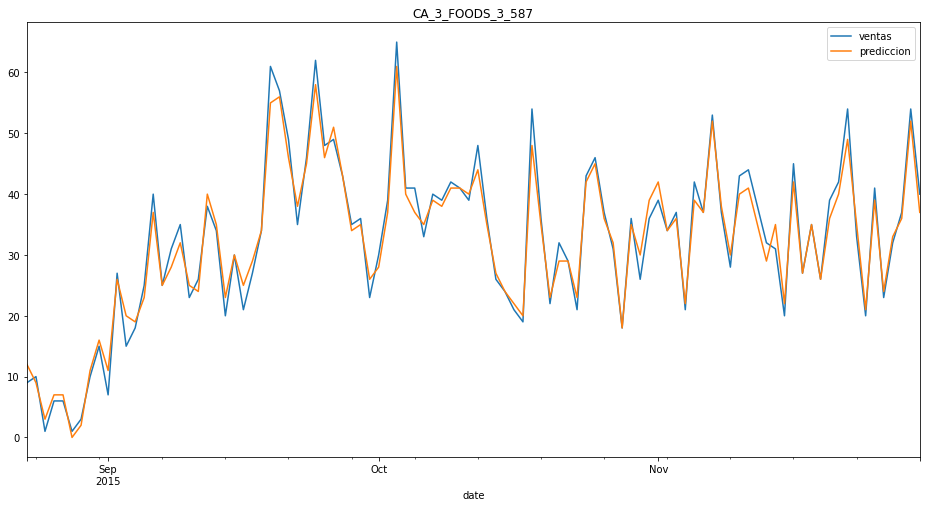

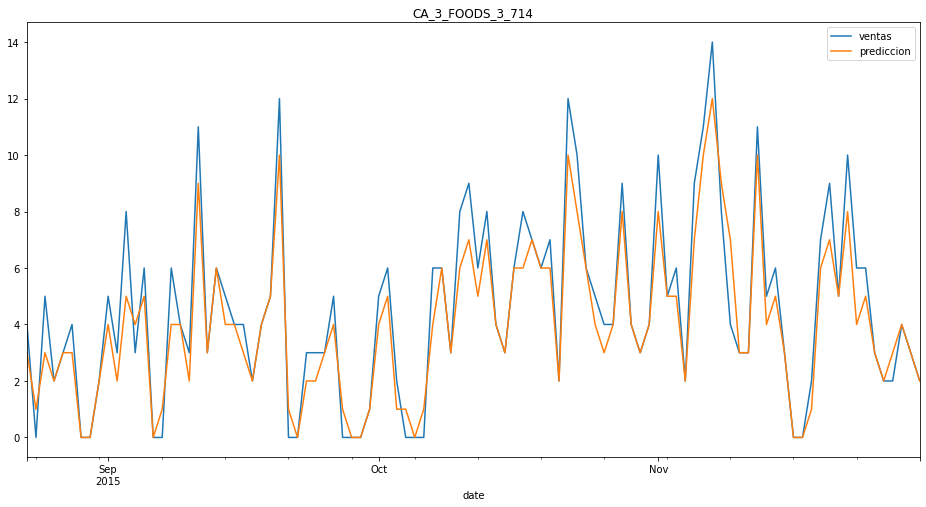

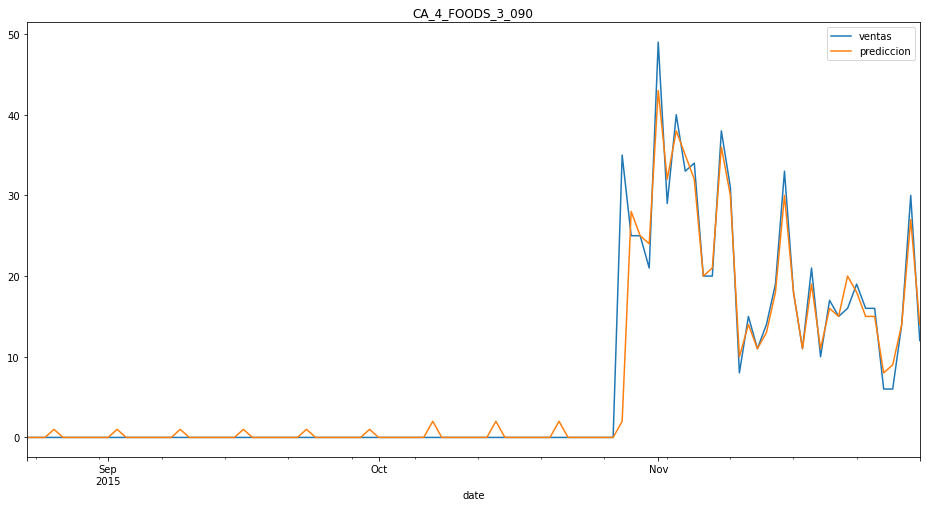

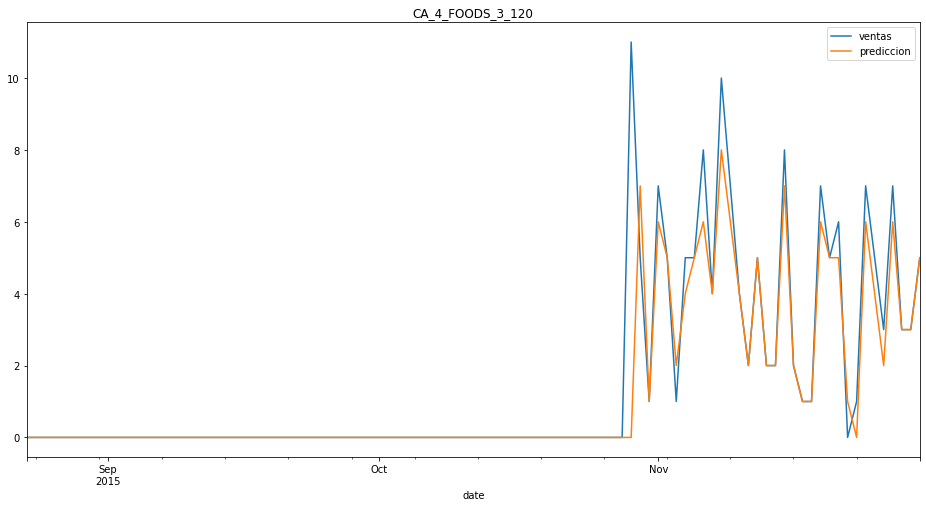

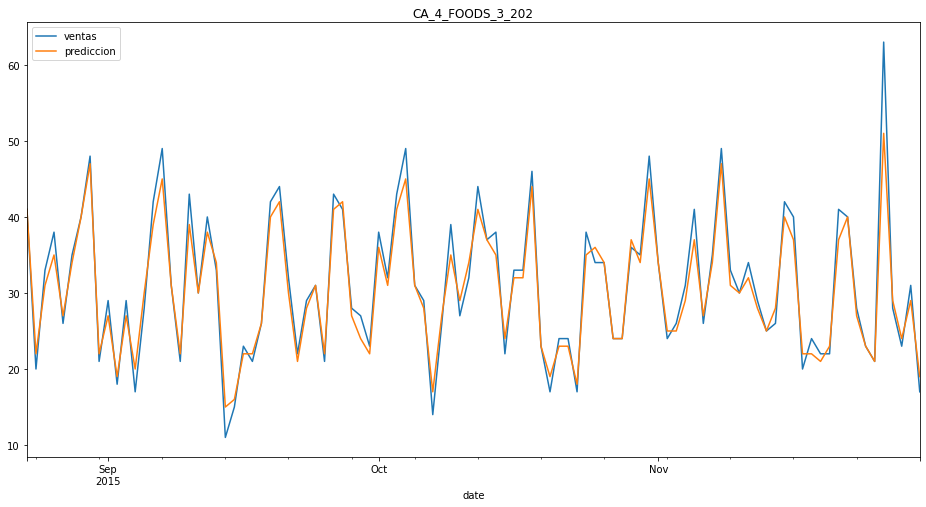

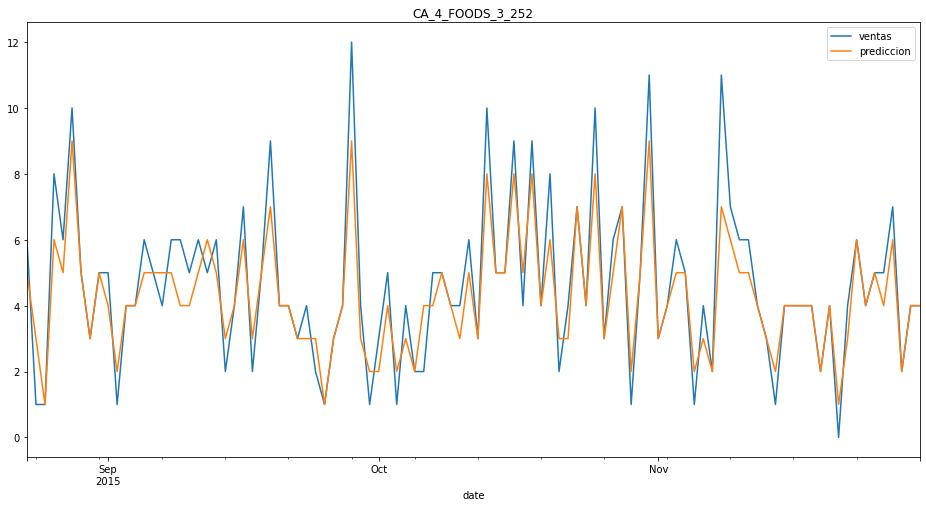

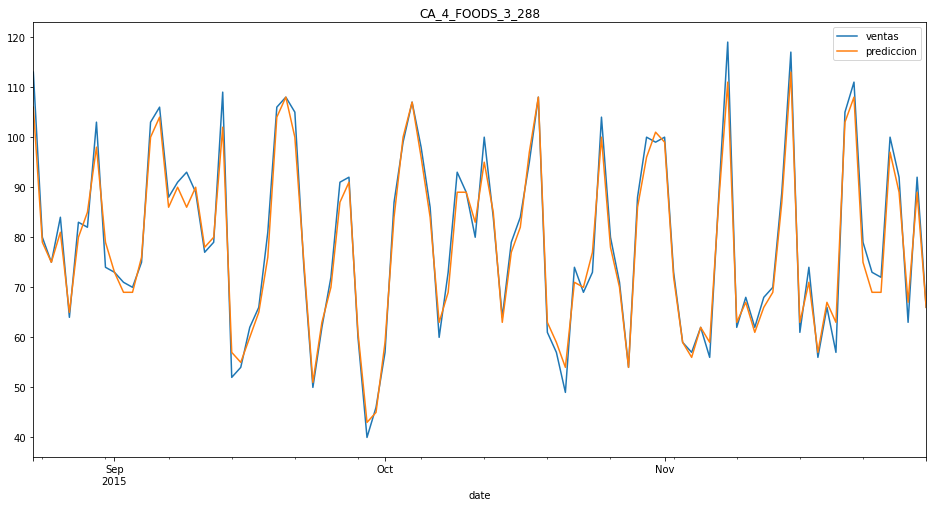

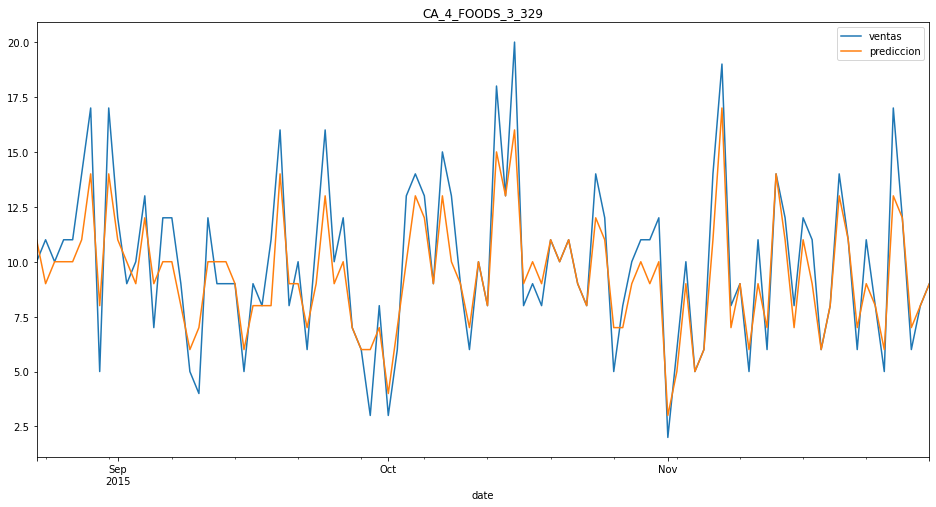

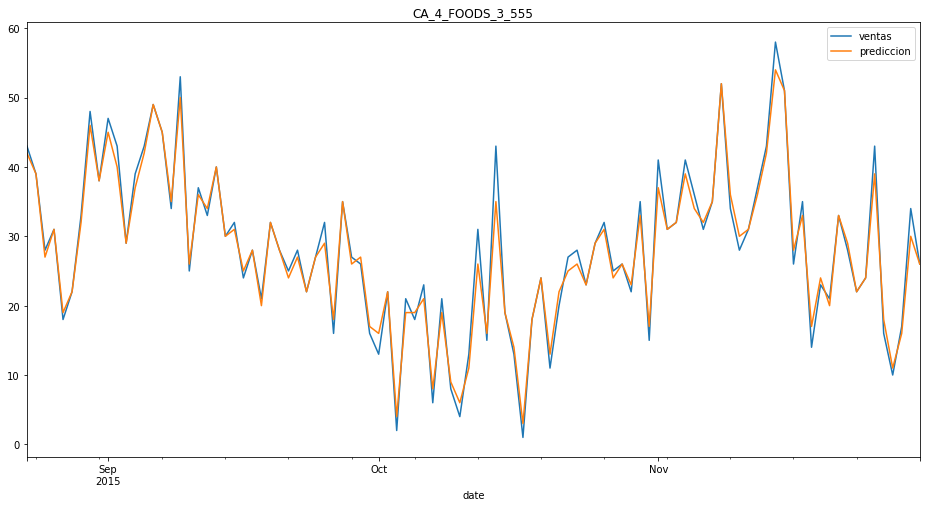

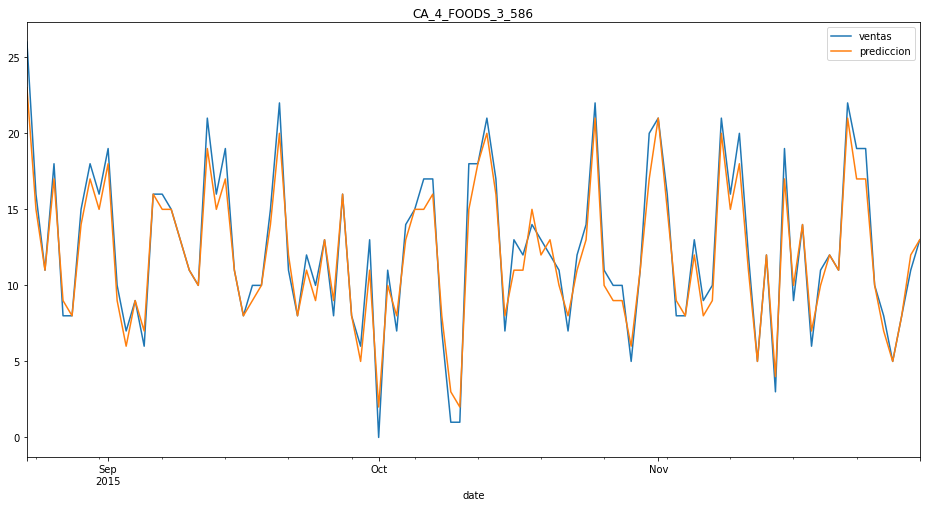

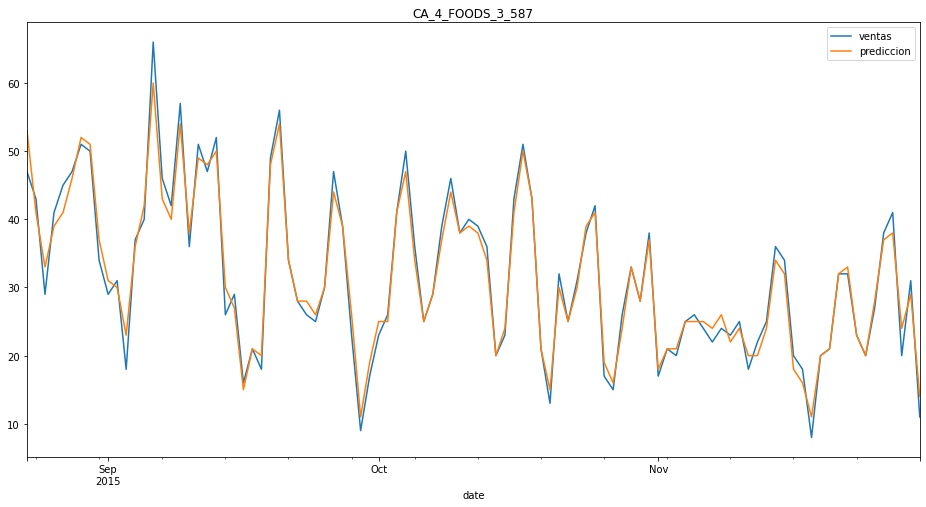

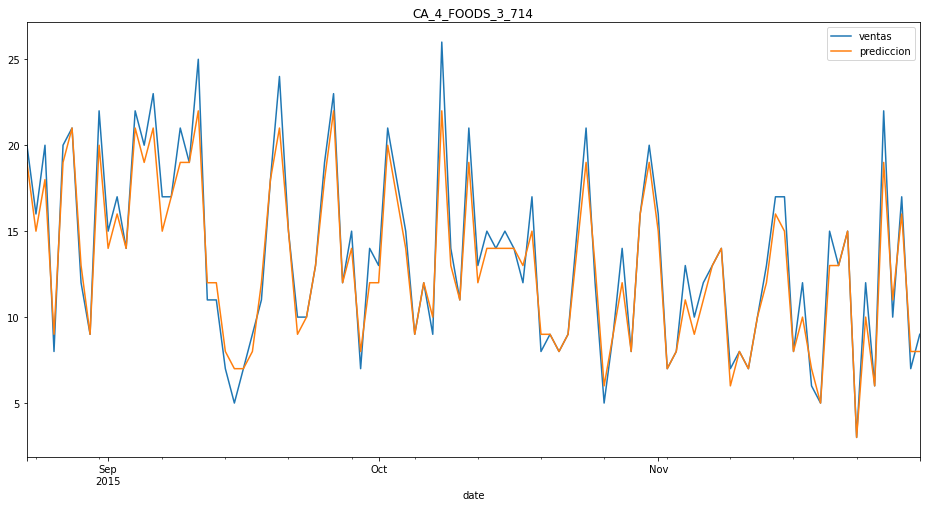

In [32]:
#unificar el df para poder extraer los x e y de cada producto
df =  pd.concat([x,y],axis=1)

for cada in range(0,len(lista_modelos)):
    
    #Prepara los datos necesarios
    producto = lista_modelos[cada][0]
    modelo = lista_modelos[cada][1]
    variables = modelo[0].feature_names_in_
    target = 'ventas'

    x_prod = df.loc[df.producto == producto].drop(columns=target).copy()
    y_prod = df.loc[df.producto == producto,'ventas'].copy()

    date = x_prod.date.values
    
    #Genera graficos de predicho vs real
    predicciones = pd.DataFrame(data={'date': date,
                                      'producto': producto,
                                      'ventas': y_prod,
                                      'prediccion': modelo.predict(x_prod[variables])})

    predicciones['prediccion'] = predicciones.prediccion.astype('int')
    predicciones.set_index('date',inplace=True)

    predicciones.tail(100).plot(figsize = (16,8),title = producto);